In [1]:
#Import relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("Metazygia monitor 1.csv")


spider_names = ['Monitor 1 Spider 1', 'Monitor 1 Spider 2', 'Monitor 1 Spider 3', 'Monitor 1 Spider4', 'Monitor 1 Spider5', 'Monitor 1 Spider6', 'Monitor 1 Spider7', 'Monitor 1 Spider8', 'Monitor 1 Spider9', 'Monitor 1 Spider10', 'Monitor 1 Spider11', 'Monitor 1 Spider12', 
'Monitor 1 Spider13', 'Monitor 1 Spider14','Monitor 1 Spider15', 'Monitor 1 Spider16', 'Monitor 1 Spider17', 'Monitor 1 Spider18', 'Monitor 1 Spider19', 'Monitor 1 Spider20', 'Monitor 1 Spider21', 'Monitor 1 Spider22', 'Monitor 1 Spider23',
'Monitor 1 Spider24', 'Monitor 1 Spider25', 'Monitor 1 Spider26', 'Monitor 1 Spider27', 'Monitor 1 Spider28', 'Monitor 1 Spider29', 'Monitor 1 Spider30', 'Monitor 1 Spider31', 'Monitor 1 Spider32',]


def wholedays(df):
    start = df.index[df['Time']=='0:00:00']
    end=df.index[df['Time']=='23:59:00']
    newdf=df[start[0]:(end[-1]+1)]
    return newdf
def setindex(df):
    df['Date_Time']=df['Date'].astype(str)+' '+df['Time']
    new=df.set_index('Date_Time')
    return new
def spiderraster(df, spider):
    min_day=24*60
    total_time = len(df.index)
    num_days = total_time//min_day
    fig, ax=plt.subplots(num_days,1, figsize=(8,12), sharey=True, sharex=True)
    #setting the y axis limit
    limit=df.replace(0, np.nan)
    std=limit.std()
    mean=limit.mean()
    u=np.mean(mean)
    s=np.mean(std)
    y=u+3*s
    #plotting the raster plots
    for i in range(0,num_days):
        ax[i].plot(df.Time[min_day*i:min_day*(i+1)], df[spider][min_day*i:min_day*(i+1)], color='blue')
        ax[i].set_ylabel('d'+str(i+1))
        ax[i].set_xticks([])
        # the y limit is the mean plus 3 standard deviations
        ax[i].set_ylim(0,y)
        #setting instructions for shading the graph when the lights are off
        dfa=df[min_day*(i):min_day*(i+1)]
        dfa=dfa.reset_index()
        if np.mean(dfa.lights)==0:
            ax[i].axvspan(0,min_day, alpha=.5,color='grey')
        else:
            for j in range(1, len(dfa.index)-1):
                global start1
                global end1
                global start2
                global end2
                if dfa.lights[j] == 1:
                    lights_on = True
                else:
                    lights_on = False
                if lights_on == False and j-1==0:
                    start1 = j
                if lights_on==False and dfa.lights[j-1] == 1:
                    start2 = j
                if lights_on==False and j==( len(dfa.index)-2):
                    end2= j
                if lights_on == False and dfa.lights[j+1] == 1:
                    end1 = j+1
            
            ax[i].axvspan(start1, end1, alpha=0.5, color='grey')
            ax[i].axvspan(start2, end2,alpha=0.5, color='grey')
    ax[num_days-1].set_xticks(range(0, min_day, 180)) 
    plt.xlabel('Time')
    plt.suptitle(spider+' Locomotor Activity')

AttributeError: 'DataFrame' object has no attribute 'Time'

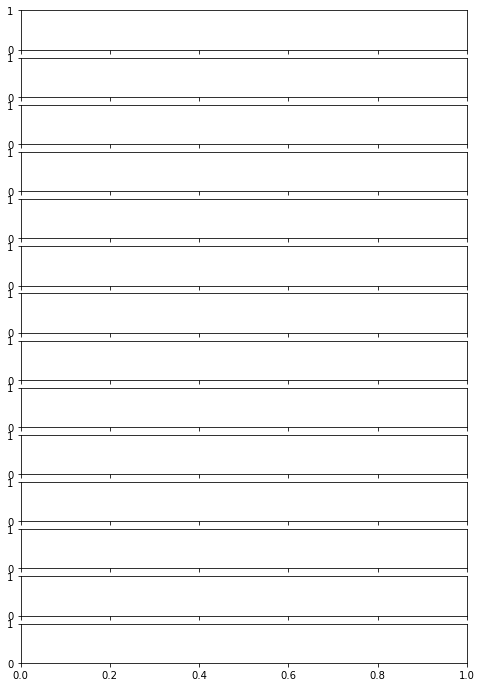

In [3]:
spiderraster(df, spider_names)